In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
da = pd.read_csv("Data_set/house_data.csv")

In [3]:
da.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Location,Price
0,1340,3,1.00,3,1955,Bangalore,221900.0
1,1690,3,2.25,3,1951,Bangalore,538000.0
2,2720,2,1.00,3,1933,Bangalore,180000.0
3,1360,4,3.00,5,1965,Bangalore,604000.0
4,1800,3,2.00,3,1987,Bangalore,510000.0


In [4]:
da.isna().any()

Living_Space(sqft)          False
No_Of_Bedrooms              False
No_Of_Bathrooms             False
Condition(on scale of 5)    False
Year_Build                  False
Location                    False
Price                       False
dtype: bool

In [5]:
# Thier is blender Mistake in sheet i.e No_Of_Bathrooms in Float value which is not appreciable.
da['No_Of_Bathrooms'] = da["No_Of_Bathrooms"].apply(np.ceil)
da.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Location,Price
0,1340,3,1.0,3,1955,Bangalore,221900.0
1,1690,3,3.0,3,1951,Bangalore,538000.0
2,2720,2,1.0,3,1933,Bangalore,180000.0
3,1360,4,3.0,5,1965,Bangalore,604000.0
4,1800,3,2.0,3,1987,Bangalore,510000.0


In [6]:
da.shape

(1199, 7)

In [7]:
da=da.dropna()

In [9]:
da.shape

(1199, 7)

In [10]:
 da["Location"].unique()

array(['Bangalore', 'Mumbai', 'Kolkata', 'Chennai', 'New Delhi', 'Patna',
       'lucknow'], dtype=object)

In [11]:
# perform hot encoding
dummy_col = pd.get_dummies(da.Location)
merge_da = pd.concat([da , dummy_col] ,  axis = "columns")
display(da.shape)
merge_da.head()

(1199, 7)

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Location,Price,Bangalore,Chennai,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340,3,1.0,3,1955,Bangalore,221900.0,1,0,0,0,0,0,0
1,1690,3,3.0,3,1951,Bangalore,538000.0,1,0,0,0,0,0,0
2,2720,2,1.0,3,1933,Bangalore,180000.0,1,0,0,0,0,0,0
3,1360,4,3.0,5,1965,Bangalore,604000.0,1,0,0,0,0,0,0
4,1800,3,2.0,3,1987,Bangalore,510000.0,1,0,0,0,0,0,0


In [13]:
final_da = merge_da.drop(["Location" , "lucknow"] ,  axis = "columns")
final_da.shape

(1199, 12)

In [14]:
#  If we get positive co-relation value it means we get direct impacton target value. 
corr =  da.corr()

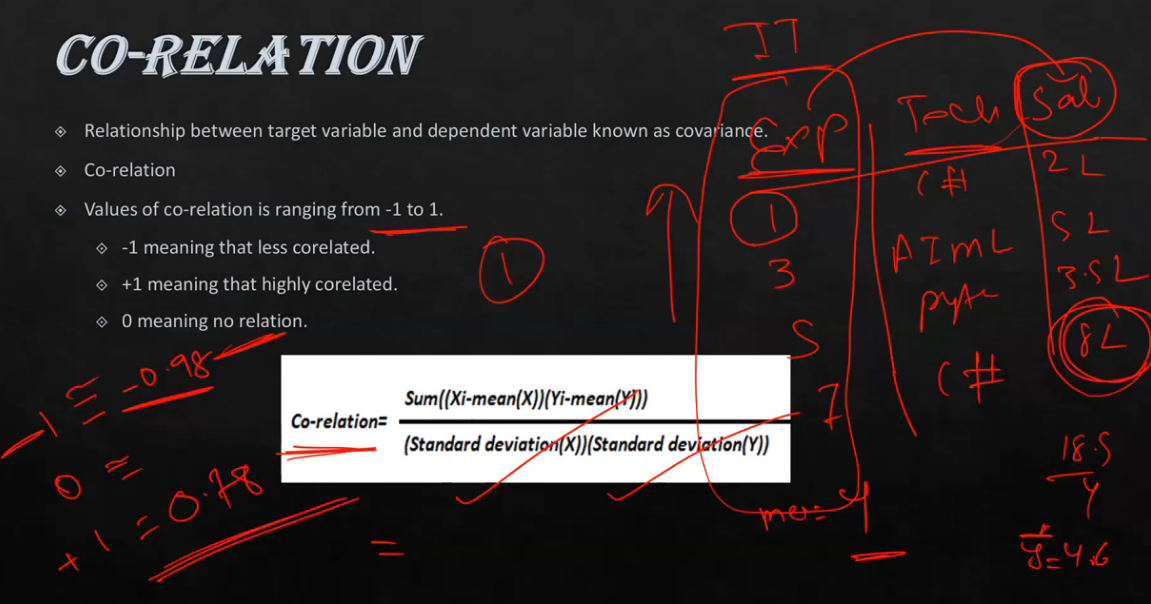

<AxesSubplot:>

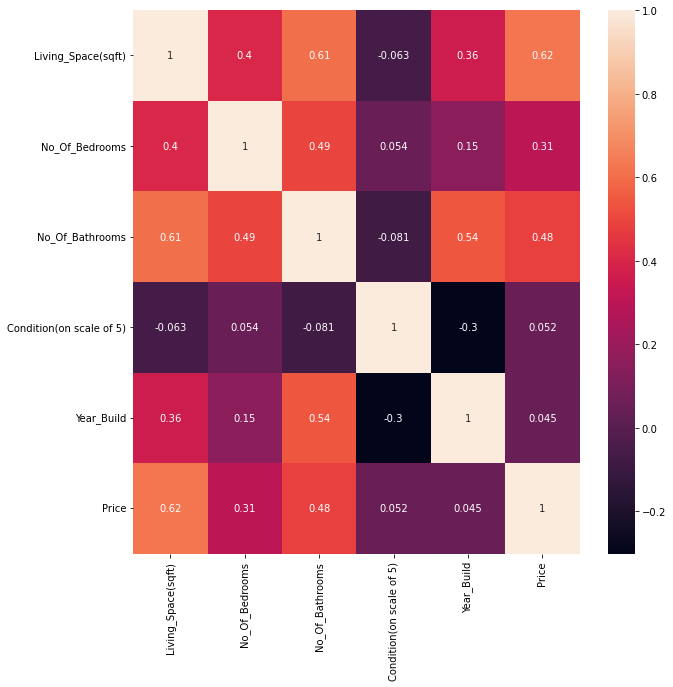

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot= True)

Here, above if Living_space increase 1 times then Price increase 0.62 times. 
If Year_build increase 1 times Price Increase 0.045 times.(This is very small factor) so we can remove this columns 


In [23]:
x = final_da.drop("Price" , axis = 1 )
y = final_da.Price

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 2/3)

In [59]:
display(x_test.shape)
display(x_train.shape)

(400, 11)

(799, 11)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [72]:
y_predict  =  lr.predict(x_test)
y_predict

array([ 241516.21586512,  279953.62436239,  267575.26979253,
        413421.1524238 ,  401067.2379448 ,  817832.75496727,
       1013983.64620385,  592816.42329826,  239449.00615824,
        689920.11796021,  781332.18503764,  192995.97027979,
        621984.35467878,  718266.78577006,  282163.7957829 ,
        511234.36052838,   24783.77615545,  177476.8173401 ,
        244467.89783377,  288104.82630094,  466188.67010262,
        561470.88165701,  703139.00423974,  314914.71566649,
         27480.39185148,  162528.1771353 ,  916872.43014737,
         21810.6099745 ,  982414.88909561,  232323.72006421,
        180354.73181433,  144571.18952327,  176173.26475222,
        475813.97294428,  786658.57489688,  614258.6801233 ,
        437329.53875639,  772995.51873984,  163247.32604924,
         96331.30522975,  472359.00026666,  958770.80874513,
        261440.72809542,  250540.79917041,  825496.16981814,
        760242.45160574,  392158.05815006,  256638.18363732,
        501433.15208925,

In [71]:
y_test

1175    505000.0
749     435000.0
968     440000.0
652     325000.0
342     425000.0
          ...   
989     484950.0
435     749000.0
1141    380000.0
829     659000.0
723     636000.0
Name: Price, Length: 400, dtype: float64

In [47]:
acc_train = lr.score(x_train , y_train)
acc_train*100

46.738072976224224

In [49]:
acc_test = lr.score(x_test , y_test)
acc_test*100

52.00430911961923

In [51]:
# error 
(1-acc_train)*100

53.261927023775776

It is not get for production. It has very high error. 

So we have to take optimization here